# Load in KeyedVectors of the google word2vec or GloVe model

In [1]:
import gensim
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

In [43]:
possibe_paths = []
possibe_paths.append(r"S:\GoogleNews-vectors-negative300.bin")
possibe_paths.append(r'C:\Users\Graeme Laptop\OneDrive - Edinburgh Napier University\DataWrangling\model\GoogleNews-vectors-negative300.bin')
possibe_paths.append(r"Loaded from D:\Users\Graeme Laptop\OneDrive - Edinburgh Napier University\DataWrangling\model\GoogleNews-vectors-negative300.bin")

try:
    print(keyedVec)
    print(keyedVec["distinction"])
except(NameError):
    try:
        keyedVec = KeyedVectors.load_word2vec_format(datapath(possibe_paths[0]), binary=True)
        print(possibe_paths[0])
    except(FileNotFoundError):
        try:
            keyedVec = KeyedVectors.load_word2vec_format(datapath(possibe_paths[1]), binary=True)
            print(possibe_paths[1])
        except(FileNotFoundError):
            keyedVec = KeyedVectors.load_word2vec_format(datapath(possibe_paths[2]), binary=True)
            print(possibe_paths[2])

[ 2.1488e-01  2.9443e-01  1.6586e-01  4.2080e-01 -4.2427e-01 -1.8325e-01
  1.8688e-02  7.6420e-05 -5.0541e-02 -1.2297e+00 -2.5328e-03  4.6637e-01
 -9.7663e-01 -1.2295e-01  3.4865e-01 -2.4286e-01 -3.2769e-01 -2.4502e-01
 -3.0424e-01 -5.9101e-01 -3.3904e-02  1.7340e-01 -6.4555e-02  6.5111e-02
 -1.0987e-01 -2.1107e-01 -1.5011e-01  6.4709e-02  4.5327e-02  3.9531e-02
  4.8585e-02 -2.1352e-01 -4.9601e-01 -2.7720e-01 -3.9492e-01  2.0881e-02
  2.3644e-01 -1.6640e-01  3.6729e-02 -3.6602e-02  3.7852e-01  6.9923e-02
  2.0408e-01  1.5604e-01 -1.7488e-02  3.6096e-01  2.1190e-02 -1.7067e-01
  3.1094e-01  1.3498e-01 -1.2891e-01  1.2551e-01  3.9640e-01  5.3265e-01
 -2.8264e-01 -1.8060e-02 -9.2546e-02 -5.6169e-01  1.6542e-01  5.6540e-01
  3.3287e-01 -8.9196e-02 -2.2391e-01  2.4151e-01  1.4009e-01 -3.2488e-01
 -2.9706e-01  6.9234e-01 -1.8441e-01  4.0190e-01 -2.3473e-01 -2.3092e-01
  5.7088e-02 -2.8218e-01 -1.8735e-01  1.6201e-01  4.5937e-01  5.5836e-01
 -5.1348e-01 -1.6492e-01  2.2622e-01  8.0865e-03 -1

In [2]:
# import gensim.downloader as api

# keyedVec = api.load("glove-wiki-gigaword-300")

# print(api.load("glove-wiki-gigaword-300", return_path=True))

KeyboardInterrupt: 

# Load in datasets used in project

In [76]:
import pandas as pd
import re
import string

train = pd.read_csv('train.csv', names=['review', 'label'])
val = pd.read_csv('val.csv', names=['review', 'label'])
test = pd.read_csv('test.csv', names=['review', 'label'])
test.iloc[26]



review     * * * * * * minor plot spoilers in review * *...
label                                                     1
Name: 26, dtype: object

# Strip punctuation

In [77]:
def strip_punctuation(x):
    # with_apostrophe = string.punctuation.replace("'", "")
    keep_apostr = string.punctuation.replace("'","")
    return x.translate(str.maketrans('', '', keep_apostr))


train['review'] = train['review'].apply(lambda x: strip_punctuation(x))

val['review'] = val['review'].apply(lambda x: strip_punctuation(x))

test['review'] = test['review'].apply(lambda x: strip_punctuation(x))


test.iloc[26]

review           minor plot spoilers in review          ...
label                                                     1
Name: 26, dtype: object

# Tokenize and apply lower() (alhough it appears the data set has no upperase letters, the process might as well be carried out)

In [78]:
import nltk
from nltk import tokenize

# nltk.download('punkt')


train['tokenized'] = [nltk.tokenize.WhitespaceTokenizer().tokenize(review.lower()) for review in train.review]

val['tokenized'] = [nltk.tokenize.WhitespaceTokenizer().tokenize(review.lower()) for review in val.review]

test['tokenized'] = [nltk.tokenize.WhitespaceTokenizer().tokenize(review.lower()) for review in test.review]

print(train['review'])
print(train['tokenized'])



0       note  some may consider portions of the follow...
1       note  some may consider portions of the follow...
2       every once in a while you see a film that is s...
3       when i was growing up in 1970s  boys in my sch...
4       the muppet movie is the first  and the best mo...
                              ...                        
1395    it's been hours since i returned from the much...
1396    i'm not sure who the genius is who came up wit...
1397    the classic story  the production which ruined...
1398    according to popular film opinion  a film's gr...
1399    i still can't figure out why people went in dr...
Name: review, Length: 1400, dtype: object
0       [note, some, may, consider, portions, of, the,...
1       [note, some, may, consider, portions, of, the,...
2       [every, once, in, a, while, you, see, a, film,...
3       [when, i, was, growing, up, in, 1970s, boys, i...
4       [the, muppet, movie, is, the, first, and, the,...
                              

# Removing stop words

In [79]:
def removeUNKWords(x):
    # x is a list of tokens
    return [token for token in x if token in keyedVec]

print(train['tokenized'])

train['tokenized'] = train['tokenized'].apply(lambda x:removeUNKWords(x))
val['tokenized'] = val['tokenized'].apply(lambda x:removeUNKWords(x))
test['tokenized'] = test['tokenized'].apply(lambda x:removeUNKWords(x))
print(train['tokenized'])

0       [note, some, may, consider, portions, of, the,...
1       [note, some, may, consider, portions, of, the,...
2       [every, once, in, a, while, you, see, a, film,...
3       [when, i, was, growing, up, in, 1970s, boys, i...
4       [the, muppet, movie, is, the, first, and, the,...
                              ...                        
1395    [it's, been, hours, since, i, returned, from, ...
1396    [i'm, not, sure, who, the, genius, is, who, ca...
1397    [the, classic, story, the, production, which, ...
1398    [according, to, popular, film, opinion, a, fil...
1399    [i, still, can't, figure, out, why, people, we...
Name: tokenized, Length: 1400, dtype: object
0       [note, some, may, consider, portions, of, the,...
1       [note, some, may, consider, portions, of, the,...
2       [every, once, in, a, while, you, see, a, film,...
3       [when, i, was, growing, up, in, 1970s, boys, i...
4       [the, muppet, movie, is, the, first, and, the,...
                           

In [80]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopset = set(stopwords.words('english'))

def removeStopWords(x):
    # x is a list of tokens
    return [token for token in x if token not in stopset]
print(train['tokenized'])

train['tokenized'] = train['tokenized'].apply(lambda x:removeStopWords(x))
val['tokenized'] = val['tokenized'].apply(lambda x:removeStopWords(x))
test['tokenized'] = test['tokenized'].apply(lambda x:removeStopWords(x))
#print(train['tokenized'].head(10))

print([word for word in stopset])

0       [note, some, may, consider, portions, of, the,...
1       [note, some, may, consider, portions, of, the,...
2       [every, once, in, a, while, you, see, a, film,...
3       [when, i, was, growing, up, in, 1970s, boys, i...
4       [the, muppet, movie, is, the, first, and, the,...
                              ...                        
1395    [been, hours, since, i, returned, from, the, m...
1396    [not, sure, who, the, genius, is, who, came, u...
1397    [the, classic, story, the, production, which, ...
1398    [according, to, popular, film, opinion, a, gre...
1399    [i, still, figure, out, why, people, went, in,...
Name: tokenized, Length: 1400, dtype: object
['this', 'he', 'or', "needn't", 'is', 'don', 'have', 'hasn', 'needn', 'himself', 'while', 'am', 'over', 'ain', 'ourselves', 'because', 'we', "isn't", 'not', 'isn', 'should', 'i', "should've", 'of', 'ma', "mightn't", 'hers', 'mustn', 'why', 'all', 'having', 'about', 'most', 'her', 'my', 'was', 'than', 'has', 'as', 's

In [81]:
traning_vocab = [word for tokens in train['tokenized'] for word in tokens]

print(len(set(traning_vocab)))

31635


# Pre-processing

In [82]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def joinColumns(x):
    return ' '.join(word for word in x)

train['joined'] = train['tokenized'].apply(lambda x:joinColumns(x))

test['joined'] = test['tokenized'].apply(lambda x:joinColumns(x))

val['joined'] = val['tokenized'].apply(lambda x:joinColumns(x))

trainWords = train['joined'].values

testWords = test['joined'].values

valWords = val['joined'].values

print(type(trainWords))


NUM_WORDS = 2001


tokenizer = Tokenizer(num_words=NUM_WORDS-1)

tokenizer.fit_on_texts(trainWords)

training_sequences = tokenizer.texts_to_sequences(trainWords)
test_sequences = tokenizer.texts_to_sequences(testWords)
val_sequences = tokenizer.texts_to_sequences(valWords)
#print(training_sequences)
# print(tokenizer.word_index)


print('Found %s unique tokens.' % len(tokenizer.word_index))



NUMBER_OF_WORDS_IN_CORPUS = len(tokenizer.word_index) + 1


print(NUMBER_OF_WORDS_IN_CORPUS)


<class 'numpy.ndarray'>
Found 31635 unique tokens.
31636


In [83]:
import numpy as np

lengths = [len(i) for i in training_sequences]

# print(lengths)

def averageLen(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

def maxSentanceLength(lst):
    return max(max(lst))

LONGEST_SENTANCE = maxSentanceLength(training_sequences)

print(LONGEST_SENTANCE)

avglengths = int(sum(lengths)/len(lengths))
avglengths

1983


220

In [84]:
maxlen=avglengths
x_train = pad_sequences(training_sequences, padding='post',maxlen=avglengths)
MAX_SEQUENCE_LENGTH = x_train.shape[1]
x_test = pad_sequences(test_sequences, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
x_val = pad_sequences(val_sequences, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
print(MAX_SEQUENCE_LENGTH)
print(x_train.shape)
print(x_train[0])

220
(1400, 220)
[ 179   81 1626  464 1318 1294   51 1397 1539 1366  351  298 1707  351
 1569  869 1460    1  185    5 1149  852  898   65  535  245  183  287
   15   21   54 1743 1480  197  165  496 1213  228  351  129  208  542
  663  378  221   37  125 1273   21   81  116   21  152   31 1744 1077
  317 1274  177  753   21   10   45  896 1538  425  301  199  301  301
 1186 1275  948 1077  151   51 1539  536    1  301  475    1 1170  251
 1019 1843  162  301  321  475  437   26  327  497 1743  301 1398 1807
   31  962  888    2   33   21    1  365  328   68 1707  145 1569   98
   56  307  414 1539  301  714  251  465 1062  662  340  676  677   74
  304    2  162  481 1570    2  714  510  626 1507   86   43 1227   21
  352  112  714  879 1886   35  714   16  344   55 1461   21  437  466
 1507 1212 1627  636  678   21  406  526    1 1981  419 1844   76  547
   33  338  489  727  636  308 1887   84 1540   28 1006  521   21 1006
   59 1063  308 1887  269 1887  905 1932 1654  126 1061  117 

In [85]:
import random
all_training_words =  [ word for word in tokenizer.word_index.keys() ]


not_in_wordvec = [word for word in all_training_words if word not in keyedVec]

if len(not_in_wordvec)>50:
    print(random.sample(not_in_wordvec,50))
     

In [86]:
import numpy as np
import tensorflow.keras.backend as K


print(len(tokenizer.word_index))

word_index = tokenizer.word_index


embeddingWeights = np.zeros((NUM_WORDS, 300))

for i in range(1, NUM_WORDS):
    word = [k for k, v in word_index.items() if v == i][0]
    if word in keyedVec:
        embeddingWeights[i,:] = keyedVec[word]
    else: 
        embeddingWeights[i,:] = np.zeros(300)


print(embeddingWeights.shape)
print(len(embeddingWeights))
print(embeddingWeights)

31635
(2001, 300)
2001
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.030351   -0.17344999 -0.097576   ...  0.26174     0.083567
  -0.19064   ]
 [-0.36756     0.39500001 -0.27034    ... -0.37252    -0.3899
   0.031491  ]
 ...
 [-0.18810999 -0.48300999  0.042851   ...  0.51789999 -0.071123
   0.2669    ]
 [-0.68010002 -0.2744     -0.16581    ...  0.22396     0.072364
  -0.11413   ]
 [ 0.39041001  0.038527    0.40478    ... -0.26234999 -0.0084754
  -0.085881  ]]


# Confirming the vectors and thier weights line up

In [101]:
import random

key_search = random.randint(1,NUM_WORDS)

search_word = [k for k, v in word_index.items() if v == key_search][0]

print(search_word)




club


In [102]:


index = tokenizer.word_index.get(search_word)

# for i in range(len(keyedVec[serach_word])):
#     assert keyedVec[serach_word][i] == embeddingWeights[tokenizer.word_index.get(serach_word)][i]

condit = np.all((keyedVec[search_word], embeddingWeights[index]))

assert condit == True

print(search_word)
print(index)
print(condit)
print(embeddingWeights[index])
print(keyedVec[search_word])

club
1075
True
[ 0.06913     0.68105     0.45039999  0.15113001  0.095532    0.011451
 -0.074666    0.45846    -0.0037597  -0.66667998  0.36458999 -0.1584
  0.47016999  0.10896     0.068953    0.14166     0.037884    0.34683999
  0.42072999 -0.33127999 -0.087771    0.032959   -0.077387    0.36036
 -0.138      -0.1602     -0.19343001  0.57168001 -0.38231999  0.049298
  0.46483999 -0.38977    -0.088219    0.43696001 -1.30369997 -0.039656
  0.33124     0.02114    -0.50063998 -0.37101001 -0.059706   -0.20186999
 -0.58886999  0.58090001  0.36434999  0.087698    0.73291999  0.34685999
 -0.40063     0.23548999 -0.34602001 -0.19412    -0.37171999  0.20238
  0.086469    0.73051    -0.11322     0.20708001  0.030003   -0.54640001
  0.26192001 -0.22019     0.068446   -0.37461999  0.12856001 -0.58411002
 -0.07398     0.071356   -0.20612    -0.91747999  0.14269     0.33374
 -0.26122001  0.1609     -0.67321002 -0.096556    0.14230999  0.070501
 -0.20536999  0.06764    -0.49770001  0.56086999  0.20572

In [89]:
import keras
from keras import layers
from keras.models import Model, Sequential

In [70]:
import matplotlib.pyplot as plt

def plot_history(training):
# Plot history: MAE
    for i, run in enumerate(training):
        plt.plot(run.history['val_loss'], label='Validation loss '+str(i+1))
        plt.plot(run.history['accuracy'], label='Accuracy '+str(i+1))
        plt.plot(run.history['loss'], label='Loss '+str(i+1))
        plt.plot(run.history['val_accuracy'], label='Validation Accuracy '+str(i+1))
    plt.title('Sentiment analysis')
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend(loc="lower left")
    plt.show()

In [90]:
y_train = train['label'].values
y_test = test['label'].values
y_val = val['label'].values

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

def biLSTM(embeddings, max_sequence_length, num_words, embedding_dim):
    

    print(num_words)
    print(embedding_dim)
    print(max_sequence_length)

    model = Sequential()
    # model.add(layers.Input(shape=(max_sequence_length,), dtype='int32'))
    
    model.add(layers.Input(shape=(max_sequence_length,)))

    model.add(layers.Embedding(
        num_words, 
        embedding_dim, 
        weights=[embeddings], 
        input_length=max_sequence_length, 
        trainable=False,
        )) #The embedding layer

    model.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Bidirectional(layers.LSTM(20)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(10))


    
    model.add(layers.Dense(1,activation='sigmoid'))



    opt = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    print(opt)
    print("0.001")
    model.summary()
    return model

bimodel = biLSTM(embeddingWeights, MAX_SEQUENCE_LENGTH, NUM_WORDS, 300)

In [23]:
def hp_biLSTM(hp):
    

    model = Sequential()

    neurons = hp.Int('neurons',min_value=5, max_value=90, step=20)
    LSTMlayers = hp.Int('LSTMlayers',min_value=0, max_value=4, step=1)
    Denselayers = hp.Int('Denselayers',min_value=0, max_value=2, step=1)
    
    print("neurons = ",neurons)
    print("LSTMlayers = ",LSTMlayers)
    print("Denselayers = ",Denselayers)
 
    model.add(layers.Input(shape=(MAX_SEQUENCE_LENGTH,)))

    model.add(layers.Embedding(
        NUM_WORDS, 
        embeddingWeights.shape[1], 
        weights=[embeddingWeights], 
        input_length=MAX_SEQUENCE_LENGTH, 
        trainable=False,
        ))

    for i in range(LSTMlayers):
        model.add(layers.Bidirectional(layers.LSTM(neurons, return_sequences=True, dropout=0.1)))
        
    model.add(layers.Bidirectional(layers.LSTM(neurons, dropout=0.1)))

    for i in range(Denselayers):
        d = i + 2
        model.add(layers.Dense(int(neurons/d))) 

    model.add(layers.Dense(1,activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate = 0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()
    return model

In [24]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization

bayesian_opt_tuner = BayesianOptimization(
    hp_biLSTM,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory=os.path.normpath(r'S:\keras_tuning_biLSTM'),
    project_name='kerastuner_bayesian_poc',
    overwrite=False)

bayesian_opt_tuner.search_space_summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, verbose=True)

bayesian_opt_tuner.search(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_val, y_val), workers = 12, use_multiprocessing=True, verbose = True, callbacks=[callback])

bayesian_opt_tuner.results_summary()

bayes_opt_models = bayesian_opt_tuner.get_best_models(num_models=5)
model = bayes_opt_models[0]
model.save(r'S:\keras_tuning_biLSTM\model')

INFO:tensorflow:Reloading Oracle from existing project S:\keras_tuning_biLSTM\kerastuner_bayesian_poc\oracle.json
neurons =  5
LSTMlayers =  0
Denselayers =  0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 300)          600300    
_________________________________________________________________
bidirectional (Bidirectional (None, 10)                12240     
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 612,551
Trainable params: 12,251
Non-trainable params: 600,300
_________________________________________________________________
INFO:tensorflow:Reloading Tuner from S:\keras_tuning_biLSTM\kerastuner_bayesian_poc\tuner0.json


neurons =  25
LSTMlayers =  2
Denselayers =  0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 300)          600300    
_________________________________________________________________
bidirectional (Bidirectional (None, 220, 50)           65200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 220, 50)           15200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 695,951
Trainable params: 95,651
Non-trainable params: 600,300
_________________________________________________________________
Epoch 1/10
88/88 [==============================] - 19s 220ms/st

INFO:tensorflow:Oracle triggered exit


neurons =  25
LSTMlayers =  2
Denselayers =  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 300)          600300    
_________________________________________________________________
bidirectional (Bidirectional (None, 220, 50)           65200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 220, 50)           15200     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 12)                612       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 696,525
Trainable params: 96,225
Non-trainable params: 600,30

2001
300
220
0.001
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 220, 300)          600300    
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 220, 40)           51360     
_________________________________________________________________
dropout_28 (Dropout)         (None, 220, 40)           0         
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 220, 40)           9760      
_________________________________________________________________
dropout_29 (Dropout)         (None, 220, 40)           0         
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 220, 40)           9760      
_________________________________________________________________
dropout_30 (Dropout)         (None,

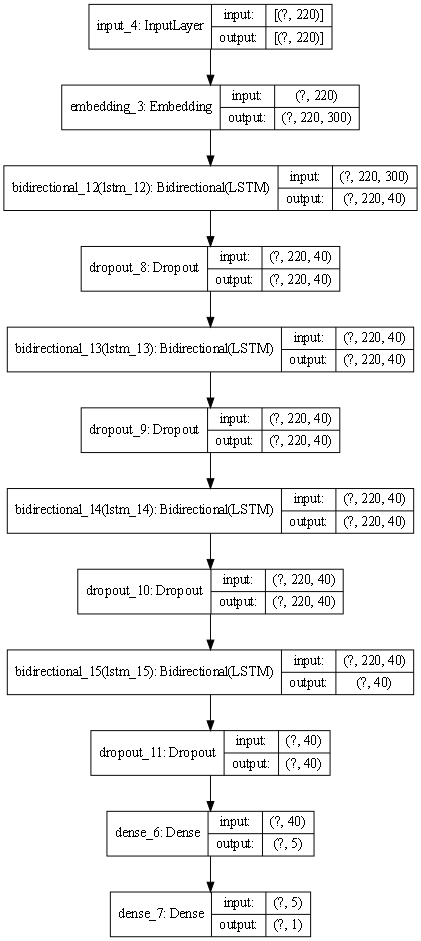

In [37]:
tf.keras.utils.plot_model(
    bimodel, to_file='model.png', show_shapes=True, dpi=70
)

In [91]:
bi1 = biLSTM(embeddingWeights, MAX_SEQUENCE_LENGTH, NUM_WORDS, 300)

y_train = train['label'].values

losscallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=2)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=r'S:\biLSTM\checkpoints', monitor='val_loss', save_only_best=True, verbose=True)

bi_training = bi1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), shuffle=True, batch_size=2, verbose=True, workers=6, use_multiprocessing=True)


2001
300
220
0.001
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 220, 300)          600300    
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 220, 40)           51360     
_________________________________________________________________
dropout_44 (Dropout)         (None, 220, 40)           0         
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 220, 40)           9760      
_________________________________________________________________
dropout_45 (Dropout)         (None, 220, 40)           0         
_________________________________________________________________
bidirectional_50 (Bidirectio (None, 220, 40)           9760      
_________________________________________________________________
dropout_46 (Dropout)         (None

train_accuracy1 =  0.9900000095367432
train_accuracy2 =  0.9785714149475098

train_loss1 =  0.03643043711781502
train_loss2 =  0.0844436064362526

val_accuracy1 =  0.7149999737739563
val_accuracy2 =  0.75

val_loss1 =  0.9325019121170044
val_loss2 =  0.7110413908958435


test_accuracy1 =  0.8374999761581421
test_accuracy2 =  0.8050000071525574
test_loss1 =  0.6189182996749878
test_loss2 =  0.5440778732299805


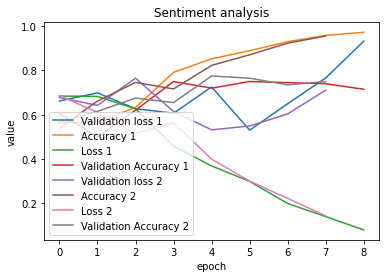

In [100]:
# 1 is glove
train_loss1, train_accuracy1 = bi1.evaluate(x_train, train['label'].values, verbose=False)
train_loss2, train_accuracy2 = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy1 = ", train_accuracy1)
print("train_accuracy2 = ", train_accuracy2)

print("\ntrain_loss1 = ", train_loss1)
print("train_loss2 = ", train_loss2)
val_loss1, val_accuracy1 = bi1.evaluate(x_val, val['label'].values, verbose=False)
val_loss2, val_accuracy2 = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy1 = ", val_accuracy1)
print("val_accuracy2 = ", val_accuracy2)
print("\nval_loss1 = ", val_loss1)
print("val_loss2 = ", val_loss2)


test_loss1, test_accuracy1 = bi1.evaluate(x_test, test['label'].values, verbose=False)
test_loss2, test_accuracy2 = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy1 = ", test_accuracy1)
print("test_accuracy2 = ", test_accuracy2)
print("test_loss1 = ", test_loss1)
print("test_loss2 = ", test_loss2)

# 2 is word 2 vec


plot_history([bi_training,bi_training2])

train_accuracy =  0.9900000095367432
train_loss =  0.03643043711781502

val_accuracy =  0.7149999737739563
val_loss =  0.9325019121170044


test_accuracy =  0.8374999761581421
test_loss =  0.6189182996749878


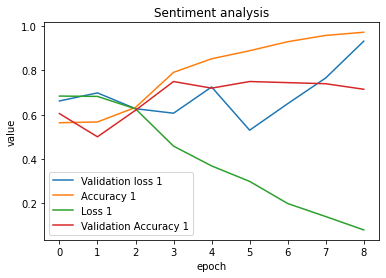

In [93]:
train_loss, train_accuracy = bi1.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi1.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi1.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history([bi_training])

train_accuracy =  0.9785714149475098
train_loss =  0.0844436064362526

val_accuracy =  0.75
val_loss =  0.7110413908958435


test_accuracy =  0.8050000071525574
test_loss =  0.5440778732299805


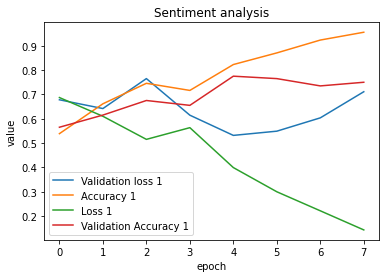

In [73]:
train_loss, train_accuracy = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history([bi_training2])

train_accuracy =  0.9578571319580078
train_loss =  0.14734572172164917

val_accuracy =  0.7549999952316284
val_loss =  0.6249856352806091


test_accuracy =  0.8299999833106995
test_loss =  0.4233439266681671


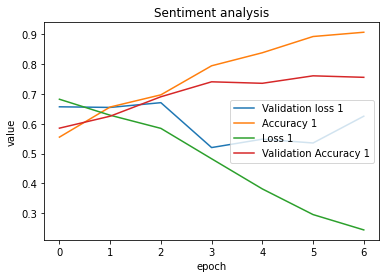

In [42]:
train_loss, train_accuracy = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history([bi_training])

train_accuracy =  0.8728571534156799
train_loss =  0.3365766704082489

val_accuracy =  0.6800000071525574
val_loss =  0.7386438250541687


test_accuracy =  0.7124999761581421
test_loss =  0.6812551021575928


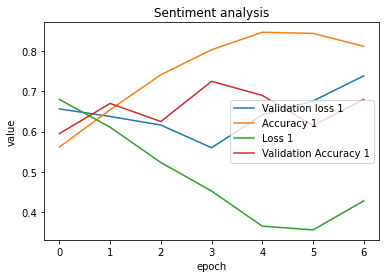

In [38]:
train_loss, train_accuracy = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history([bi_training])

train_accuracy =  0.9242857098579407
train_loss =  0.21353447437286377

val_accuracy =  0.8050000071525574
val_loss =  0.4677537679672241


test_accuracy =  0.8424999713897705
test_loss =  0.42621028423309326


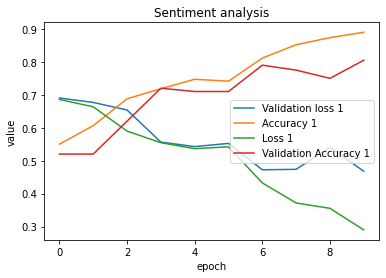

In [58]:
train_loss, train_accuracy = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history([bi_training])

train_accuracy =  0.9375175833702087
train_loss =  0.20427614450454712

val_accuracy =  0.7733879685401917
val_loss =  0.5465010404586792


test_accuracy =  0.8227596282958984
test_loss =  0.4123910665512085


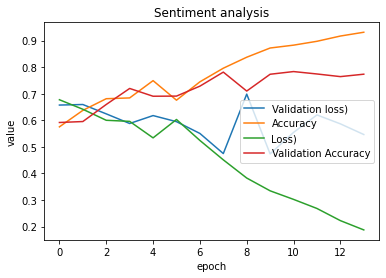

In [129]:
train_loss, train_accuracy = bi.evaluate(x_train, train['label'].values, verbose=False)
print("train_accuracy = ", train_accuracy)
print("train_loss = ", train_loss)

val_loss, val_accuracy = bi.evaluate(x_val, val['label'].values, verbose=False)
print("\nval_accuracy = ", val_accuracy)
print("val_loss = ", val_loss)


test_loss, test_accuracy = bi.evaluate(x_test, test['label'].values, verbose=False)
print("\n\ntest_accuracy = ", test_accuracy)
print("test_loss = ", test_loss)
plot_history(bi_training)